# 1. Scala'nın gerçek dünya proje havuzu verileri
* Scala, son zamanlarda veri bilimciler için öne çıkan bir başka dil haline gelen genel amaçlı bir programlama dili.
* Scala aynı zamanda open source bir projedir. Bu nedenle kimlerin değişiklik yaptığı, nelerin değiştirildiği, kod incelemeleri vb herkese açıktır.
* Git ve GitHub'dan gelen verileri kapsayan Scala'nın gerçek dünya proje repository'sini okuyacak, temizleyecek ve görselleştireceğiz. Gelişimi üzerinde en çok kimin etkisi var öğrenilecek.
* GitHub'dan çıkarılan veri seti üç dosyadan oluşuyor;
    * <code>pulls_2011-2013.csv</code>: 2011-2013 arasındaki pull request(çekme istekleri) ile ilgili temel bilgileri içerir.
    * <code>pulls_2014-2018.csv</code>: 2014-2018 arasında aynı bilgiyi içerir.
    * <code>pull_files.csv</code>: Her bir pull request tarafından değiştirilen dosyaları içerir.

In [1]:
# pandası import et
import pandas as pd

# verisetlerini import et
pulls_one = pd.read_csv("datasets/pulls_2011-2013.csv")
pulls_two = pd.read_csv("datasets/pulls_2014-2018.csv")
pull_files = pd.read_csv("datasets/pull_files.csv")

# 2. Verinin hazırlanması ve temizlenmesi
* İlk olarak iki farklı zamanın verilerini birleştirmek gerek.
* Ardından GitHub'dan çıkarılan ham veriler, ISO8601 biçimindeki tarihleri içerir. Ancak pandas bunları normal string olarak import eder. Analizi kolaylaştırmak için dizeleri Python'ın DateTime nesnelerine dönüştürmemiz gerekir. DateTime nesneleri, karşılaştırılabilir ve sıralanabilir.
* Pull request sürelerinin tümü UTC formatındadır. Ama taahhüt süreleri saat dilimi bilgileriyle birlikte yazarın yerel saatindedir. Karşılaştırmaları kolaylaştırmak için tüm zamanları UTC'ye çevirmeliyiz.

In [6]:
# veri setlerini birleştir
pulls = pulls_one.append(pulls_two)

# veri türünü datetime yap
pulls["date"] = pd.to_datetime(pulls["date"], utc = True)

# 3. Merging the DataFrames
* Çıkarılan veriler iki ayrı dosyada gelir. İki DataFrame'i birleştirmek, gelecekteki görevlerde verileri analiz etmemizi kolaylaştıracaktır.

In [9]:
# DataFrameleri birleştirme
data = pulls.merge(pull_files, on = "pid")

# 4. Proje halen aktif olarak sürdürülüyor mu?
* Açık kaynaklı projelerdeki aktivite çok tutarlı değildir. Bir projeye katkıda bulunmadan önce projenin durumunu anlamak önemlidir. Gelişme istikrarlı bir şekilde mi gidiyor, yoksa bir düşüş mü var?
* Bu projede kullanılan veriler 2018 yılının Ocak ayında toplanmıştır. O tarihe kadar olan katkı sayısının gelişimi ile ilgileniyoruz.
* Scala için bunu projenin aktivite grafiğini çizerek yapacağız. Projenin ömrü boyunca her ayda gönderilen pull requestlerinin sayısını hesaplayacağız. Daha sonra katkıların eğilimini görmek için grafik çizilecek.

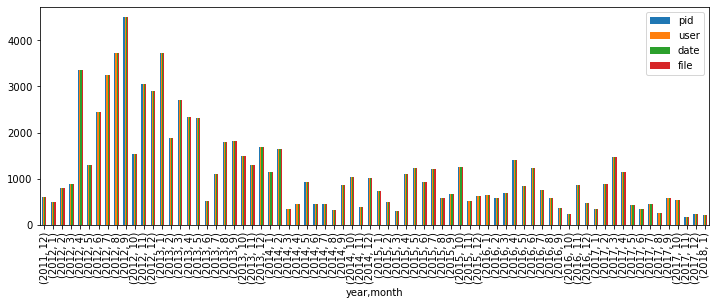

In [12]:
%matplotlib inline

# ay bilgisini tutacak bir "month" sütunu oluştur
data['month'] = data["date"].dt.month

# yıl bilgisini tutacak bir "year" sütunu oluştur
data['year'] = data["date"].dt.year

# veri setini ay ve yıla göre gruplayarak pull request hesapla
counts = data.groupby(["year", "month"]).count()

# sonuçları çiz
counts.plot(kind='bar', figsize = (12,4))

# 5. Projede dostluk var mı?
* Büyük projelere katkıda bulunmak daha iyidir. Küçük topluluklarda dışarıdan gelen pull request isteklerini kabul etmede çekinilir.
* Her kullanıcıdan gelen pull request sayısının bi historamı çizilecek. Az sayıda pull request yapan az sayıda insan varsa projeye yeni katkıda bulunanları karşılamıyor demektir.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

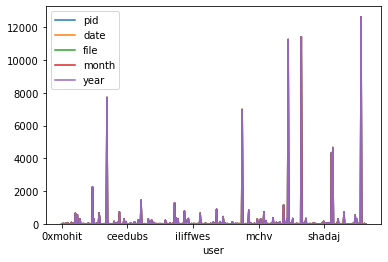

In [13]:
# Required for matplotlib
%matplotlib inline

# Gönderen tarafından gruplandır
by_user = data.groupby("user").count()

# Histogramı çiz
by_user.plot().hist("pid")

# 6. Son 10 pull requestte hangi dosyalar değişti?
* Katkıda bulunmak için doğru dosyayı seçmek katkıda bulunulacak proje kadar önemlidir. Kodun bazı bölümleri kararlı, bazı bölümleri ölü olabilir. Orada katkıda bulunmak en fazla etkiye sahip olmayabilir. Bu nedenle sistemin son zamanlarda değiştirilen kısımlarını anlamak önemlidir. Bu kodun "sıcak" alanlarını belirlememizi sağlar. Bu parçalara odaklanmak zamanımızın en etkili kullanımı olmayabilir.

In [15]:
last_10 = pulls.nlargest(10, "date", "last")
joined_pr = last_10.merge(pull_files, on = "pid")
files = set(joined_pr["file"])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

# 7. Belirli bir dosyaya en çok pull request  kim yaptı?
* Projeye katkıda bulunmak için biraz rehberliğe ihtiyacımız olabilir. Kod tabanıyla ilgili bazı bilgilere ihtiyacımız olabilir. Soruları doğru kişiye yöneltmek önemlidir. Doğru kişiyi bulmanın yolu onların katkı geçmişini kullanmaktır.
* Src/compiler/scala/reflect/reify/phases/Calculate.scala'nın yakın zamanda değiştirildiğini belirledik. Bu dosyayı değiştiren ilk 3 geliştiriciyle ilgileniyoruz. Bu geliştiriciler, kodu en iyi anlayan kişilerdir.

In [16]:
# Bu, ilgilendiğimiz dosya:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Sadece bu dosyaya gelen pull requestler
file_pr = data[data["file"] == file]

# Her geliştirici tarafından yapılan pull request sayıları
author_counts = file_pr["user"].value_counts()

# En üst 3 satırdaki geliştiriciler
print(author_counts.head(3))

xeno-by     11
retronym     5
soc          4
Name: user, dtype: int64


# 8. Belirli bir dosyada son on çekme isteğini kim yaptı?
* Ne kadar da zamanında çok pull request yapmış birisi varsa hala yapmak istemeyebilir. O yüzden yakın tarihin araştırılması mantıklıdır.
* Önceki görevde olduğu gibi, src/compiler/scala/reflect/reify/phases/Calculate.scala geçmişine bakacağız.

In [19]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Sadece bu dosyaya gelen pull requestler
file_pr = pull_files[pull_files["file"] == file]

# Elde edilen sonucu pulls ile birleştirme
joined_pr = pulls.merge(file_pr, on='pid')

# En son 10 pull request yapmış kişiler
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

# 9. İki özel geliştiricinin pull requestleri
* Son zamanlarda projeye en çok katkıyı veren kim? Bu kişinin sorularımızı yanıtlama olasılığı yüksek. Yıllara göre yazarların gönderdiği pull request sayısını anlamamız lazım. Bu bize projeye katkı eğilimlerinin görüntüsünü verecek.

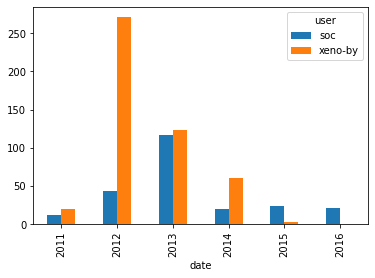

In [20]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author["user"], by_author["date"].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind="bar")

# 10. Her geliştiricinin katkılarını görselleştirme
* En deneyimlisi kim?

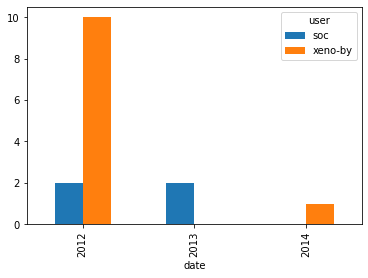

In [21]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author["file"] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')